In [2]:
# conda create -n pytorch_practice python=3.10.12
# conda activate pytorch_practice
# conda install jupyter pandas numpy matplotlib scikit-learn tqdm pip

In [4]:
import torch
import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
import sys

print(f"Python version: {sys.version}")
print(f"PyTorch version: {torch.__version__}")

# Check PyTorch has access to MPS (Metal Performance Shader, Apple's GPU architecture)
print(f"Is MPS (Metal Performance Shader) built? {torch.backends.mps.is_built()}")
print(f"Is MPS available? {torch.backends.mps.is_available()}")

# Set the device      
device = "mps" if torch.backends.mps.is_available() else "cpu"
print(f"Using device: {device}")

Python version: 3.10.12 (main, Jul  5 2023, 15:02:25) [Clang 14.0.6 ]
PyTorch version: 2.0.1
Is MPS (Metal Performance Shader) built? True
Is MPS available? True
Using device: mps


In [7]:
# Tensors

# Create a tensor from a list

# scalar
scalar = torch.tensor(7)
scalar

tensor(7)

In [8]:
scalar.ndim

0

In [9]:
# tensor back as python int
scalar.item()

7

In [10]:
vector = torch.tensor([1, 2, 3, 4])
vector

tensor([1, 2, 3, 4])

In [11]:
vector.ndim

1

In [12]:
vector.shape

torch.Size([4])

In [14]:
# MATRIX
MATRIX = torch.tensor([[1, 2, 3],
                          [4, 5, 6]])
MATRIX

tensor([[1, 2, 3],
        [4, 5, 6]])

In [15]:
MATRIX.ndim

2

In [16]:
MATRIX[0]

tensor([1, 2, 3])

In [20]:
MATRIX[1][2]

tensor(6)

In [21]:
MATRIX.shape

torch.Size([2, 3])

In [43]:
# # Tensor
# TENSOR = torch.tensor([[[1, 2, 3],
#                         [4, 5, 6],
#                           [7, 8, 9],
#                             [10, 11, 12]]])

# # Tensor
TENSOR = torch.tensor([[[[[1, 2, 3],
                        [4, 5, 6]]],
                          [[[7, 8, 9],
                            [10, 11, 12]]]],
                            [[[[1, 2, 3],
                        [4, 5, 6]]],
                          [[[7, 8, 9],
                            [10, 11, 12]]]]])


TENSOR

tensor([[[[[ 1,  2,  3],
           [ 4,  5,  6]]],


         [[[ 7,  8,  9],
           [10, 11, 12]]]],



        [[[[ 1,  2,  3],
           [ 4,  5,  6]]],


         [[[ 7,  8,  9],
           [10, 11, 12]]]]])

In [44]:
TENSOR.ndim

5

In [45]:
TENSOR.shape

torch.Size([2, 2, 1, 2, 3])

In [47]:
# TENSOR[0]

In [51]:
# Random tensors
# Why random tensors?
# Random tensors are important because the way many neural networks are initialized is by generating a bunch of random tensors 
# and then updating those tensors based on the patterns found in the data.

# Create a random tensor
random_tensor = torch.rand(3,4)
random_tensor

tensor([[0.3255, 0.8612, 0.5153, 0.2217],
        [0.9219, 0.9068, 0.4543, 0.5823],
        [0.7787, 0.6248, 0.8373, 0.0350]])

In [53]:
random_image_size_tensor = torch.rand(size=(3, 224, 224))
random_image_size_tensor.shape, random_image_size_tensor.ndim

(torch.Size([3, 224, 224]), 3)

In [57]:
# zeroes and ones tensors
# Create a tensor of all zeros
zeros = torch.zeros(3, 4)
zeros

tensor([[0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.]])

In [58]:
zeros*random_tensor

tensor([[0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.]])

In [59]:
# Create a tensor of all ones
ones = torch.ones(3, 4)

In [60]:
ones*random_tensor

tensor([[0.3255, 0.8612, 0.5153, 0.2217],
        [0.9219, 0.9068, 0.4543, 0.5823],
        [0.7787, 0.6248, 0.8373, 0.0350]])

In [61]:
ones.dtype

torch.float32

In [62]:
random_tensor.dtype

torch.float32

In [68]:
# Create a range of tensors and tensors-like
tensor_range = torch.arange(start=0, end=10, step=3)
tensor_range

tensor([0, 3, 6, 9])

In [73]:
# Creating tensors like
tensor_range2 = torch.zeros_like(input=tensor_range)
# torch.ones_like(input=tensor_range)
# torch.rand_like(input=tensor_range, dtype=torch.float32)

tensor_range2

tensor([0, 0, 0, 0])

# Tensor datatypes

Note: tensor datatypes is one of the 3 big errors you'll run into with Pytorch & deep learning
1. tensors not right data type
2. tensors not right shape
3. tensors not right device

In [82]:
# Tensor datatypes
float_16_tensor = torch.tensor([1, 2, 3],
                               dtype=None, # what datatype is the tensor
                               device="mps", # where to store the tensor (CPU or GPU)
                               requires_grad=False) # whether or not to track gradient operations of these tensors

float_16_tensor

tensor([1, 2, 3], device='mps:0')

In [84]:
float_32_tensor = float_16_tensor.to(dtype=torch.float32)

In [85]:
float_32_tensor.dtype

torch.float32

In [86]:
float_32_tensor*float_16_tensor

tensor([1., 4., 9.], device='mps:0')

In [96]:
int32_tensor = torch.tensor([1, 2, 3], dtype=torch.long)
int32_tensor

tensor([1, 2, 3])

In [92]:
float_32_tensor*int32_tensor

RuntimeError: Expected all tensors to be on the same device, but found at least two devices, mps:0 and cpu!

### getting information from tensors

1. To get datatype, use "tensor.dtype"
2. To get shape, use "tensor.shape"
3. To get dimension, use "tensor.ndim"
4. To get device, use "tensor.device"

In [100]:
random_tensor = torch.rand(3, 4)
random_tensor.dtype

torch.float32

In [101]:
random_tensor.shape, random_tensor.size()

(torch.Size([3, 4]), torch.Size([3, 4]))

### Manipulating tensors (tensor operations)

Tensor operations include:
- addition
- subtraction
- multiplication (element-wise)
- division
- matric multiplication

In [115]:
tensor = torch.tensor([1, 2, 3])
# tensor + 10
# tensor * 10
# tensor - 10
# tensor / 10
# torch.add(tensor, 10)
# torch.mul(tensor, 10)
# torch.sub(tensor, 10)
torch.div(tensor, 10)

tensor([0.1000, 0.2000, 0.3000])

### Matrix multiplication

2 main ways of multiplication in NN and Deep Learning

1. element wise multiplication
2. matrix multiplication (dot product)

2 main rules that matrix multipliction needs to satisfy
1. The **inner dimensions** must match:
* `(3,2) @ (2,6)`

2. The resulting matrix has the shape of the outer dimensions.

In [118]:
print(tensor, "*", tensor)
print(f"Equals: {torch.mul(tensor, tensor)}")

tensor([1, 2, 3]) * tensor([1, 2, 3])
Equals: tensor([1, 4, 9])


In [119]:
torch.matmul(tensor, tensor)

tensor(14)

In [122]:
%%time

value=0
for i in range(len(tensor)):
    value += tensor[i]*tensor[i]
print(f"Equals: {value}")

Equals: 14
CPU times: user 860 µs, sys: 1.54 ms, total: 2.4 ms
Wall time: 1.93 ms


In [124]:
%%time

torch.matmul(tensor, tensor)

CPU times: user 206 µs, sys: 41 µs, total: 247 µs
Wall time: 208 µs


tensor(14)

In [133]:
### One of the most common errors in deep learning is shape errors

# Shapes for matrix multiplication
tensor_A = torch.tensor([[1, 2],
                          [3, 4],
                          [5, 6]])

tensor_B = torch.tensor([[7, 10],
                          [8, 11],
                          [9, 12]])

In [134]:
# torch.mm is the same as torch.matmul

torch.mm(tensor_A, tensor_B)

RuntimeError: mat1 and mat2 shapes cannot be multiplied (3x2 and 3x2)

In [135]:
tensor_A.shape, tensor_B.shape

(torch.Size([3, 2]), torch.Size([3, 2]))

To fix our tensor shape issues, we can manipulate the shape using a **transpose**

A transpose switched the axis or dimensions of a given tensor

In [139]:
tensor_B, tensor_B.shape

(tensor([[ 7, 10],
         [ 8, 11],
         [ 9, 12]]),
 torch.Size([3, 2]))

In [140]:
tensor_B.T, tensor_B.T.shape

(tensor([[ 7,  8,  9],
         [10, 11, 12]]),
 torch.Size([2, 3]))

In [141]:
# The matrix multiplication works when tensor_B is transposed
torch.mm(tensor_A, tensor_B.T)

tensor([[ 27,  30,  33],
        [ 61,  68,  75],
        [ 95, 106, 117]])

Finding the min max mean sum etc

In [147]:
# create a tensor
x = torch.arange(0, 100, 10)
x, x.dtype

(tensor([ 0, 10, 20, 30, 40, 50, 60, 70, 80, 90]), torch.int64)

In [143]:
# find the min
torch.argmin(x), x.min()
# torch.argmax(x), x.max()

tensor(0)

In [148]:
# torch.mean() requires the input tensor to be float32
torch.mean(x.type(torch.float32)), x.type(torch.float32).mean()

(tensor(45.), tensor(45.))

In [149]:
# find the sum
torch.sum(x), x.sum()

(tensor(450), tensor(450))

In [151]:
x.argmin(), x.argmax()

(tensor(0), tensor(9))

### Reshaping, stacking, squeezing & unsqueezing tensors

- Reshaping - reshapes an input tensor to a defined shape
- View - return a view of an input tensor of a certain shape but keep the same memory as the original tensor
- Stacking - combining multiple tensors on top of each other (vstack) or side by side (hstack)
- Squueze - removes all '1' dimensions from a tensor
- Unsquueze - add a '1' dimensions to a target tensor

In [167]:
import torch
x = torch.arange(1., 10.)
x, x.shape

(tensor([1., 2., 3., 4., 5., 6., 7., 8., 9.]), torch.Size([9]))

In [169]:
# Add an extra dimension
x_reshaped = x.reshape(1, 9)
x_reshaped, x_reshaped.shape

(tensor([[1., 2., 3., 4., 5., 6., 7., 8., 9.]]), torch.Size([1, 9]))

In [163]:
x_reshaped = x.reshape(9, 1)
x_reshaped, x_reshaped.shape

(tensor([[1.],
         [2.],
         [3.],
         [4.],
         [5.],
         [6.],
         [7.],
         [8.],
         [9.]]),
 torch.Size([9, 1]))

In [170]:
# Change the view
z = x.view(1,9)
z, x.shape

(tensor([[1., 2., 3., 4., 5., 6., 7., 8., 9.]]), torch.Size([9]))

In [171]:
# Changing z changes x because a view shares the same memory as the original tensor
z[:, 0] = 5
z, x

(tensor([[5., 2., 3., 4., 5., 6., 7., 8., 9.]]),
 tensor([5., 2., 3., 4., 5., 6., 7., 8., 9.]))

In [181]:
# Stack tensors on top
x_stacked = torch.stack([x, x, x], dim=1)
x_stacked, x_stacked.shape

(tensor([[5., 5., 5.],
         [2., 2., 2.],
         [3., 3., 3.],
         [4., 4., 4.],
         [5., 5., 5.],
         [6., 6., 6.],
         [7., 7., 7.],
         [8., 8., 8.],
         [9., 9., 9.]]),
 torch.Size([9, 3]))

In [186]:
# squeeze a tensor - removes all single dimensions from a targret tensor
print(f"Previous tensor: {x_reshaped}")
print(f"Previous tensor shape: {x_reshaped.shape}")

# Remove extra dimensions from x_reshaped
x_sqeezed = x_reshaped.squeeze()
print(f"New Squeezed tensor: {x_sqeezed}")
print(f"New Squeezed tensor shape: {x_sqeezed.shape}")


Previous tensor: tensor([[5., 2., 3., 4., 5., 6., 7., 8., 9.]])
Previous tensor shape: torch.Size([1, 9])
New Squeezed tensor: tensor([5., 2., 3., 4., 5., 6., 7., 8., 9.])
New Squeezed tensor shape: torch.Size([9])


In [193]:
# add a dimension of 1 to a tensor's shape
# torch.unsqueeze()

print(f"Previous target: {x_sqeezed}")
print(f"Previous target shape: {x_sqeezed.shape}")

# Add an extra dimension with unsqueeze
x_unsqeezed = x_sqeezed.unsqueeze(dim=0)
print(f"New unsqueezed tensor: {x_unsqeezed}")
print(f"New unsqueezed tensor shape: {x_unsqeezed.shape}")

Previous target: tensor([5., 2., 3., 4., 5., 6., 7., 8., 9.])
Previous target shape: torch.Size([9])
New unsqueezed tensor: tensor([[5., 2., 3., 4., 5., 6., 7., 8., 9.]])
New unsqueezed tensor shape: torch.Size([1, 9])


In [197]:
# Torch.permute() - rearranges the dimensions of a tensor
x_original = torch.rand(size=(224, 224, 3)) #[height, width, colour_chanels]

# Permute the original tensor to rearrange the axis ( or dim) order
x_permuted = x_original.permute(2, 0, 1) #[colour_chanels, height, width]

print(f"Previous shape: {x_original.shape}")
print(f"New shape: {x_permuted.shape}")

Previous shape: torch.Size([224, 224, 3])
New shape: torch.Size([3, 224, 224])


In [199]:
x_original[0, 0, 0] = 73982
x_original[0, 0, 0], x_permuted[0, 0, 0]

(tensor(73982.), tensor(73982.))

### Indexing (selecting data from tensors)

Indexsing with PTorch is similar to indexing with NumPy

In [203]:
# Create a tenssor
import torch
x = torch.arange(1, 10).reshape(1,3,3)
x, x.shape

(tensor([[[1, 2, 3],
          [4, 5, 6],
          [7, 8, 9]]]),
 torch.Size([1, 3, 3]))

In [204]:
#Let's index on our tensor
x[0]

tensor([[1, 2, 3],
        [4, 5, 6],
        [7, 8, 9]])

In [205]:
# Let's index on the middle bracket (dim=1)
x[0][0]

tensor([1, 2, 3])

In [212]:
# Let's index on the most inner bracket (last dimension)
x[0][2][2]

tensor(9)

In [213]:
# You can also use ":" to select all items of a target dimensio
x[:,0]

tensor([[1, 2, 3]])

In [223]:
# Get all values of the 0th & 1st dimensions but only index 1 of 2nd dimension
x[:, :, 2]
# x[0, 2, :]

tensor([[3, 6, 9]])

In [229]:
# Get all values of the 0th dimension but only the 1 index value of 1st and 2nd dimensions
x[:, 1, 1], x[0, 1, 1]

(tensor([5]), tensor(5))

In [230]:
# Get index 0 of 0th and 1st dimension and all values of 2nd dimension
x[0, 0, :]
# same as x[:,0]

tensor([1, 2, 3])

In [232]:
# Index on x to return 9
x[0, 2, 2]

# Index on x to return 3, 6, 9
x[0, :, 2]

tensor([3, 6, 9])

# Pytorch tensors & NumPy

NumPy is a popular scientific computing library.
And because of this, Pytorch has functionality to interact with it

* Data in NumPy, want in PyTorch tensor -> 'torch.from_numpy(ndarray)'
* PyTorch tensor -> NumPy -> torch.numpy()


In [242]:
# Numpy array to tensor
import torch
import numpy as np

array = np.arange(1, 8.0)
# tensor = torch.from_numpy(array) 
# warning: when converting from numpy to pytorch, pytorch reflects numpys default dtype of float64 unless specified
tensor = torch.from_numpy(array).type(torch.float32)
array, tensor

(array([1., 2., 3., 4., 5., 6., 7.]), tensor([1., 2., 3., 4., 5., 6., 7.]))

In [243]:
array.dtype, tensor.dtype

(dtype('float64'), torch.float32)

In [244]:
# View the default dtype of a tensor
torch.arange(1,8.0).dtype

torch.float32

In [245]:
# Change the value of array, what will this do to a tensor?
array = array + 1
array, tensor
# Nothing changes in the tensor
# The tensor is created in new memory


(array([2., 3., 4., 5., 6., 7., 8.]), tensor([1., 2., 3., 4., 5., 6., 7.]))

In [246]:
# Tensor to numpy array
tensor = torch.ones(7)
numpy_array = tensor.numpy()
tensor, numpy_array

(tensor([1., 1., 1., 1., 1., 1., 1.]),
 array([1., 1., 1., 1., 1., 1., 1.], dtype=float32))

In [247]:
numpy_array.dtype, tensor.dtype
# Keep in mind default of numpy is float64 and pytorch is float32

(dtype('float32'), torch.float32)

In [248]:
# Change the tensor
tensor = tensor + 1
tensor, numpy_array
# The numpy array does not share memory with the tensor

(tensor([2., 2., 2., 2., 2., 2., 2.]),
 array([1., 1., 1., 1., 1., 1., 1.], dtype=float32))

## Reporoducability - taking the random out of random

In short, how a NN learns:

`start with random numbers -> tensor operations -> update rand # -> again -> again..`

To reduce randomness in neural networks & pytorch comes the concept of **random seed**.

Essentially what the random seed is 'flavour' the randomness.

Extra resources: https://pytorch.org/docs/stable/notes/randomness.html

In [264]:
import torch

# Create two random tensors
torch.rand(3,3)
random_tensor_A = torch.rand(3,4)
random_tensor_B = torch.rand(3,4)

print(f"First random tensor: \n{random_tensor_A}")
print(f"Second random tensor: \n{random_tensor_B}\n")
print(random_tensor_A == random_tensor_B)

First random tensor: 
tensor([[0.7295, 0.8845, 0.7995, 0.3273],
        [0.0654, 0.4392, 0.9857, 0.3740],
        [0.9514, 0.4427, 0.8519, 0.7036]])
Second random tensor: 
tensor([[0.8035, 0.6494, 0.4401, 0.7423],
        [0.3843, 0.4088, 0.8408, 0.7236],
        [0.9272, 0.8986, 0.4642, 0.9059]])

tensor([[False, False, False, False],
        [False, False, False, False],
        [False, False, False, False]])


In [269]:
# Let's make some random but reproducible tensors
import torch
# Set the random seed
RANDOM_SEED = 77
torch.manual_seed(RANDOM_SEED)
random_tensor_C = torch.rand(3,4)
torch.manual_seed(RANDOM_SEED)
random_tensor_D = torch.rand(3,4)
print(f"First random tensor: \n{random_tensor_C}")
print(f"Second random tensor: \n{random_tensor_D}\n")
print(random_tensor_C == random_tensor_D)
# Random seed generally works only for 1 block of code so be careful.

First random tensor: 
tensor([[0.2919, 0.2857, 0.4021, 0.4645],
        [0.9503, 0.2564, 0.6645, 0.8609],
        [0.3538, 0.3347, 0.7285, 0.5794]])
Second random tensor: 
tensor([[0.2919, 0.2857, 0.4021, 0.4645],
        [0.9503, 0.2564, 0.6645, 0.8609],
        [0.3538, 0.3347, 0.7285, 0.5794]])

tensor([[True, True, True, True],
        [True, True, True, True],
        [True, True, True, True]])


In [271]:
# Running tensors and Pytorch objects on the GPUs (and making faster computations)

# Use GPU if available
device = "mps" if torch.backends.mps.is_available() else "cpu"
print(f"Using device: {device}")

# Count the number of devices available
# torch.cuda.device_count()

Using device: mps


0

## Putting tensors and models on the GPU

The reason we want our tensors/models on the GPU is beacause usig a GPu results in faster computations.

In [272]:
tensor = torch.ones(10, 10)

tensor.device

device(type='cpu')

In [273]:
tensor_on_gpu = tensor.to(device)
tensor_on_gpu.device

device(type='mps', index=0)

## 4. Moving tensors back to the CPU

In [274]:
tensor_on_gpu.numpy()
# numpy doesnt work with GPUs

TypeError: can't convert mps:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.

In [276]:
# To fix this, we can move our tensor back to the CPU
tensor_back_on_cpu = tensor_on_gpu.cpu().numpy()
tensor_back_on_cpu

array([[1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]], dtype=float32)

In [278]:
tensor_on_gpu

tensor([[1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]], device='mps:0')

In [279]:
import torch
from torch import nn
import matplotlib.pyplot as plt

torch.__version__

'2.0.1'

In [280]:
# Create *known* parameters
weight = 0.7
bias = 0.3

# Create
start = 0
end = 1
step = 0.02

# Why unsqueeze? https://stackoverflow.com/questions/57237352/why-unsqueeze-in-pytorch
X = torch.arange(start, end, step).unsqueeze(dim=1)
y = weight* X + bias

X[:10], y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

In [281]:
# Splitting the data into train and test sets

# Let's create a training & test set
train_split = int(0.8*len(X))
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

len(X_train), len(X_test), len(y_train), len(y_test)


(40, 10, 40, 10)

In [282]:
def plot_predictions(train_data=X_train,
                     train_labels=y_train,
                     test_data=X_test,
                     test_labels=y_test,
                     predictions=None):
    """
    Plots training data, test data and compares predictions if not None.
    """
    plt.figure(figsize=(10, 7))

    # Plot training data in blue
    plt.scatter(train_data, train_labels, c='b',s=4,label='Training data')

    plt.scatter(test_data, test_labels, c='g',s=4, label='Testing data')

    # Are there predictions?
    if predictions is not None:
        plt.scatter(test_data, predictions, c='r',s=4, label='Predictions')
    
    plt.legend()

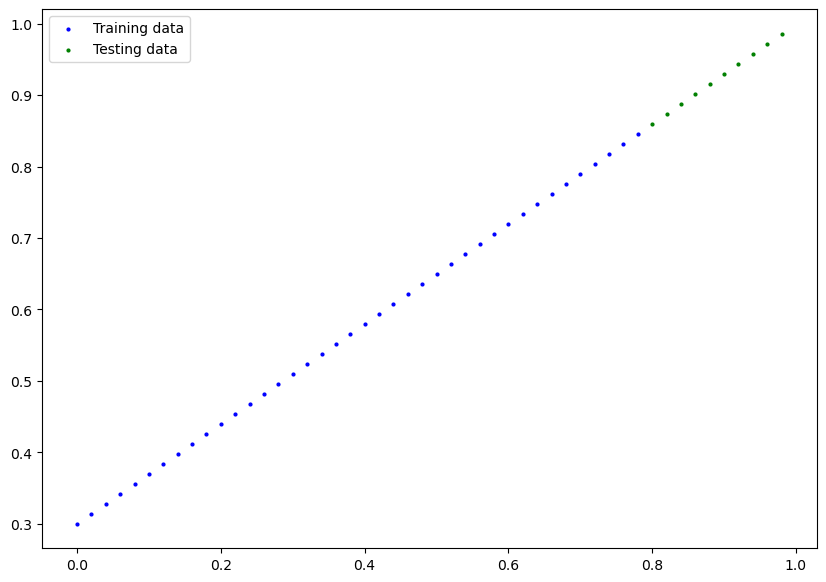

In [283]:
plot_predictions()

## Build model

Our first PyTorch model!

We will be building classes - https://realpython.com/python3-object-oriented-programming/


In [294]:
from torch import nn

# Create linear regression model class
class LinearRegressionModel(nn.Module): # <- almost everything inherits from nn.Module
    def __init__(self):
        super().__init__()

        # Initialize the model parameters
        self.weights = nn.Parameter(torch.randn(1,
                                    requires_grad=True, # set by default
                                    dtype=torch.float))
        self.bias = nn.Parameter(torch.randn(1,
                                             requires_grad=True,
                                             dtype=torch.float))
    
    def forward(self, x: torch.Tensor): # -> "x" is the input data
        return x * self.weights + self.bias # linear reg formula

### PyTorch model building essentials

* torch.nn - contains all of the building blokcs for computational graphs (a nn is a computational graph)
* torch.nn.Parameter - what parameters should our model try and learn, often a Pytorch layer from torch.nn will set these three for us
* torch.nn.Module - The base class for all nn modules, if u subclass it, you should overwrite forward()
* torch.optim - where optimizers live, helps with grad descent
* def forward() - All nn.Module subclasses require you to overwrite forward()

### Checking the contents of our Pytorch model

Now we've created a model, let's see what's inside

So we can check out model params or whats inside our model using .parameters()

In [442]:
# Create a random seed
torch.manual_seed(42)

# Create an instance of the model (this is a subclass of nn.Module)
model_0 = LinearRegressionModel()
model_0, model_0.parameters()

(LinearRegressionModel(), <generator object Module.parameters at 0x13a18d460>)

In [443]:
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [444]:
# Dictionary of the params of the model
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [445]:
weight, bias # ideal values

(0.7, 0.3)

In [446]:
X_test, y_test

(tensor([[0.8000],
         [0.8200],
         [0.8400],
         [0.8600],
         [0.8800],
         [0.9000],
         [0.9200],
         [0.9400],
         [0.9600],
         [0.9800]]),
 tensor([[0.8600],
         [0.8740],
         [0.8880],
         [0.9020],
         [0.9160],
         [0.9300],
         [0.9440],
         [0.9580],
         [0.9720],
         [0.9860]]))

In [447]:
y_preds = model_0(X_test)
y_preds

tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]], grad_fn=<AddBackward0>)

In [448]:
### making predictions using `torch.inference_mode()`
 # predictions will be faster in inference_mode because pytorch won't keep track of gradients like it does during training
with torch.inference_mode():
    y_preds = model_0(X_test)

# # inference_mode is no_grad on steroids - https://twitter.com/PyTorch/status/1437838231505096708?lang=en
# with torch.no_grad():
#     y_preds = model_0(X_test)

print(f"Predictions: \n{y_preds[:10]}")

Predictions: 
tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]])


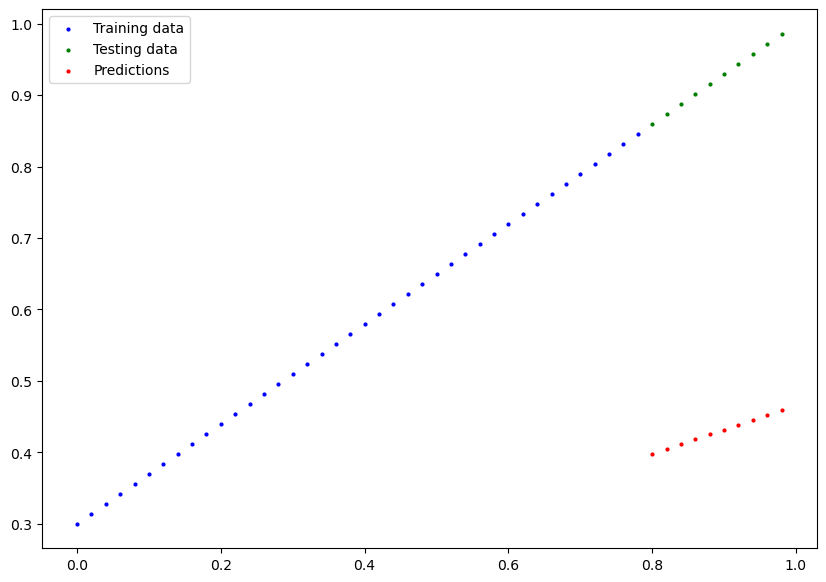

In [449]:
plot_predictions(predictions=y_preds)

### Train model

One way to measure how good or bad our model is performing is a loss function

- Note: Loss function may also be called cost function

Things we need to train:
- Loss function: measures how wrong your models predictions are, lower better
- Optimizer: takes into account the loss of a model and adjusts the model's parameters (ex: weight & bias)

And specifically for PyTorch, we need:
- A training loop
- A testing loop

In [450]:
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [451]:
# Check out our model's params
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [452]:
# Setup a loss function
loss_fn = nn.L1Loss()

# Setup an optimizer (SGD)
optimizer = torch.optim.SGD(params=model_0.parameters(), lr=0.001)

### Building a training loop and testing loop

A couple of things we need in a training loop:
0. Loop through the data
1. Forward pass (this involves data moving through our `forward()` functions) to make predictions on data - also called forward propagation
2. Calculate the loss (compare pass predictions to ground truth labels)
3. optimizer zero grad
4. Loss backward - move backwards through the network to calculate gradient of each parameters with respect to the loss (**backpropagation**)
5. Optimizer step - use the optimizer's params tp try and improve the loss (**grad descent**)

In [453]:
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [463]:
# An epoch is 1 loop through the data... (this is a hyperparameter because we've set it initially)
epochs = 1000

epoch_count = []
loss_values = []
test_loss_values = []

## Training the model
# 0. Loop through the data
for epoch in range(epochs):
    # Set the model to training mode
    model_0.train() # train mode in pytorch sets all parameters that require gradients to require gradients

    # 1. Forward pass
    y_pred = model_0(X_train)

    # 2. Calculate loss
    loss = loss_fn(y_pred, y_train)
    print(f"Epoch {epoch + 1} training loss: {loss.item():.4f}")

    # 3. Optimizer zero grad
    optimizer.zero_grad()

    # 4. Backward pass
    loss.backward()

    # 5. Step the optimizer
    optimizer.step() # by default how the optimizer will accumulate through the loop so... we have to zero them in step 3

    # Testing
    model_0.eval() # turns off diff settings in the model (like dropout) which is not needed for testing
    with torch.inference_mode():
        # Forward pass
        test_pred = model_0(X_test)

        # Calculate loss
        test_loss = loss_fn(test_pred, y_test)
    
    if epoch % 10 == 0:
        epoch_count.append(epoch)
        loss_values.append(loss)
        test_loss_values.append(test_loss)

        print(f"Epoch {epoch}| Loss: {loss} | Test loss: {test_loss}")
    
        print(model_0.state_dict())

Epoch 1 training loss: 0.0175
Epoch 0| Loss: 0.017490629106760025 | Test loss: 0.04084048420190811
OrderedDict([('weights', tensor([0.6131])), ('bias', tensor([0.3365]))])
Epoch 2 training loss: 0.0175
Epoch 3 training loss: 0.0174
Epoch 4 training loss: 0.0174
Epoch 5 training loss: 0.0174
Epoch 6 training loss: 0.0173
Epoch 7 training loss: 0.0173
Epoch 8 training loss: 0.0173
Epoch 9 training loss: 0.0172
Epoch 10 training loss: 0.0172
Epoch 11 training loss: 0.0171
Epoch 10| Loss: 0.017147328704595566 | Test loss: 0.040013112127780914
OrderedDict([('weights', tensor([0.6149])), ('bias', tensor([0.3358]))])
Epoch 12 training loss: 0.0171
Epoch 13 training loss: 0.0171
Epoch 14 training loss: 0.0170
Epoch 15 training loss: 0.0170
Epoch 16 training loss: 0.0170
Epoch 17 training loss: 0.0169
Epoch 18 training loss: 0.0169
Epoch 19 training loss: 0.0169
Epoch 20 training loss: 0.0168
Epoch 21 training loss: 0.0168
Epoch 20| Loss: 0.016803428530693054 | Test loss: 0.03918575122952461
Or

In [464]:
epoch_count, np.array(torch.tensor(loss_values).cpu().numpy()), np.array(torch.tensor(test_loss_values).cpu().numpy())

([0,
  10,
  20,
  30,
  40,
  50,
  60,
  70,
  80,
  90,
  100,
  110,
  120,
  130,
  140,
  150,
  160,
  170,
  180,
  190,
  200,
  210,
  220,
  230,
  240,
  250,
  260,
  270,
  280,
  290,
  300,
  310,
  320,
  330,
  340,
  350,
  360,
  370,
  380,
  390,
  400,
  410,
  420,
  430,
  440,
  450,
  460,
  470,
  480,
  490,
  500,
  510,
  520,
  530,
  540,
  550,
  560,
  570,
  580,
  590,
  600,
  610,
  620,
  630,
  640,
  650,
  660,
  670,
  680,
  690,
  700,
  710,
  720,
  730,
  740,
  750,
  760,
  770,
  780,
  790,
  800,
  810,
  820,
  830,
  840,
  850,
  860,
  870,
  880,
  890,
  900,
  910,
  920,
  930,
  940,
  950,
  960,
  970,
  980,
  990],
 array([0.01749063, 0.01714733, 0.01680343, 0.01646037, 0.0161169 ,
        0.015773  , 0.01543011, 0.01508646, 0.01474272, 0.01439985,
        0.01405603, 0.01371246, 0.0133695 , 0.01302559, 0.0126822 ,
        0.01233906, 0.01199516, 0.01165195, 0.01130863, 0.01096472,
        0.01062168, 0.01027819, 0.0099

Text(0.5, 1.0, 'Training and test loss')

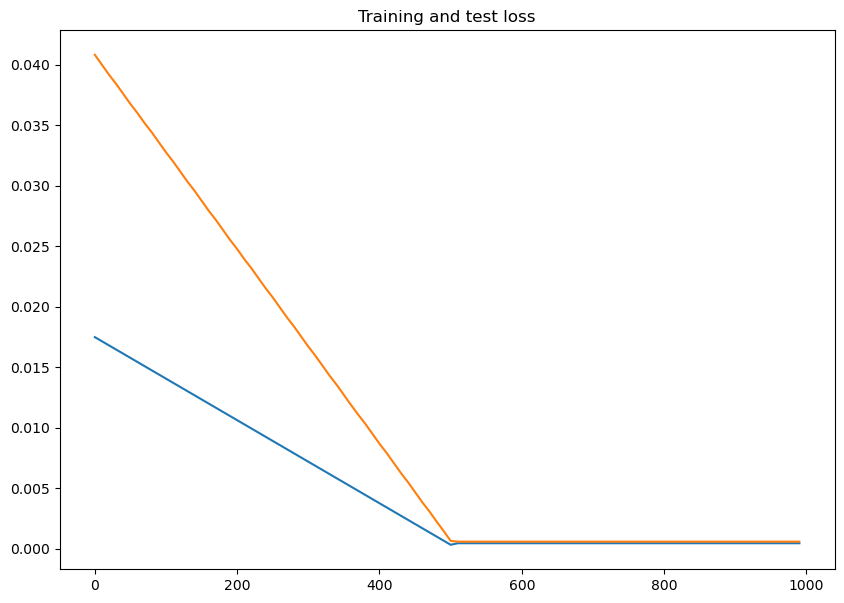

In [465]:
# Plot the loss curves
plt.figure(figsize=(10, 7))

plt.plot(epoch_count, np.array(torch.tensor(loss_values).cpu().numpy()), label="Training loss")
plt.plot(epoch_count, np.array(torch.tensor(test_loss_values).cpu().numpy()), label="Test loss")
plt.title("Training and test loss")

In [466]:
with torch.inference_mode():
    y_preds_new = model_0(X_test)

# plt.plot(epoch_count, loss_values, label='Training loss')
# plt.plot(epoch_count, test_loss_values, label='Test loss')

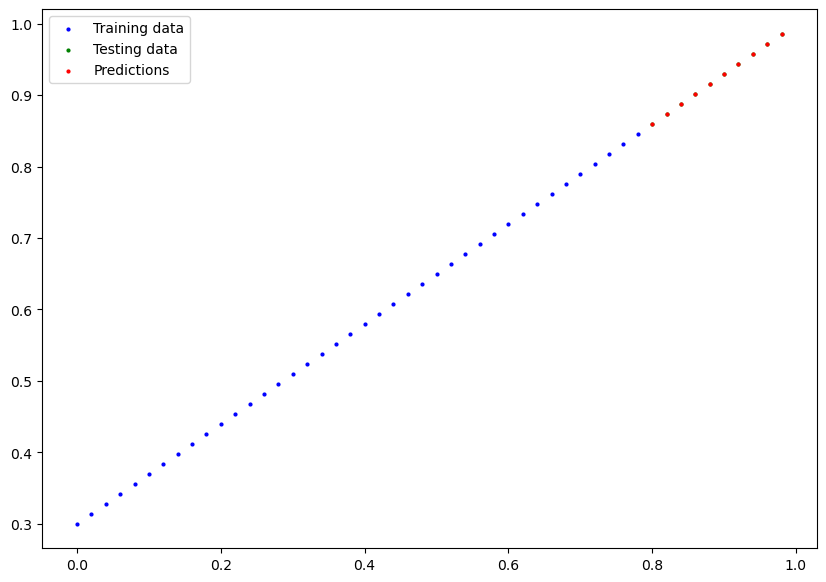

In [467]:
plot_predictions(predictions=y_preds_new)

### Saving a model

3 main methods to save & load models

1. torch.save() - allows you to save the model in Python's pickle format
2. torch.load() - allows you to load a saved PyTorch object
3. torch.nn.Module.load_state_dict() - allows you to load a model's saved state dictionary

In [468]:
# Saving our PyTorch model
from pathlib import Path

# 1. Create directory
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)

# 2. Create model save path
MODEL_NAME = "model_0.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

# 3. Save the model's state_dict
print(f"Saving model state dict at: {MODEL_SAVE_PATH}")
torch.save(obj=model_0.state_dict(), f=MODEL_SAVE_PATH)

Saving model state dict at: models/model_0.pth


## Loading a PyTorch model
Since we saved our model's state_dict rather than the entire model, we'll create a new instance of our model class and load the state_dict into that

In [469]:
# To load in a sate_dict, we have to instantiate a new instance of our model class
loaded_model_0 = LinearRegressionModel()

# Load the saved state dict into the model
loaded_model_0.load_state_dict(torch.load(MODEL_SAVE_PATH))
loaded_model_0.state_dict()

OrderedDict([('weights', tensor([0.6994])), ('bias', tensor([0.2998]))])

In [470]:
# make some predictions with the loaded model
loaded_model_0.eval()
with torch.inference_mode():
    loaded_model_preds = loaded_model_0(X_test)

loaded_model_preds

tensor([[0.8593],
        [0.8733],
        [0.8873],
        [0.9013],
        [0.9152],
        [0.9292],
        [0.9432],
        [0.9572],
        [0.9712],
        [0.9852]])

In [473]:
# Compare model_0 preds with loaded_model_0 preds
# y_preds_new == loaded_model_preds
torch.equal(y_preds_new, loaded_model_preds)

True

### Putting everything together

In [474]:
import torch
from torch import nn
import matplotlib.pyplot as plt

torch.__version__


'2.0.1'

In [475]:
device = "mps" if torch.backends.mps.is_available() else "cpu"
print(f"Using device: {device}")

Using device: mps


### Data

In [515]:
# Create some data using Linear regression formula
# y = weight * x + bias
weight = 0.7
bias = 0.3

# Create range values
start = 0
end = 1
step = 0.02

# Create X and y
X = torch.arange(start, end, step).unsqueeze(dim=1)
y = weight * X + bias
X[:10], y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

In [516]:
# Split the data into train and test sets
train_split = int(0.8*len(X))
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

len(X_train), len(X_test), len(y_train), len(y_test)

(40, 10, 40, 10)

<Figure size 1000x700 with 0 Axes>

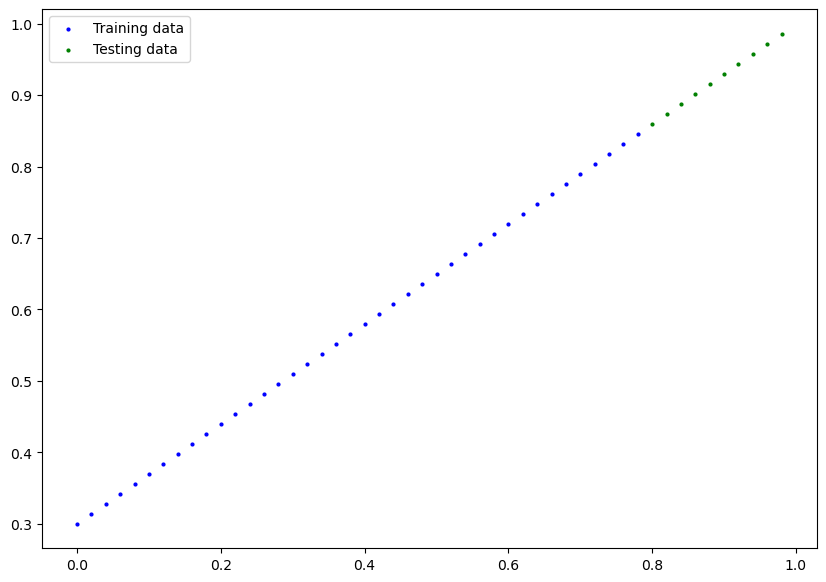

In [517]:
# Plot the data
plt.figure(figsize=(10, 7))
plot_predictions(X_train, y_train, X_test, y_test) # function we defined earlier

In [523]:
# Build a model
class LinearRegressionModelV2(nn.Module):
    def __init__(self):
        super().__init__()
        # Use nn.Linear to create a linear regression model
        # aka linear transform, dense layer, fully-connected layer
        self.linear_layer = nn.Linear(in_features=1,
                                      out_features=1)

    def forward(self, x: torch.Tensor) -> torch.Tensor:
        return self.linear_layer(x)

# Set the manual seed
torch.manual_seed(42)
model_1 = LinearRegressionModelV2()
model_1, model_1.state_dict()


(LinearRegressionModelV2(
   (linear_layer): Linear(in_features=1, out_features=1, bias=True)
 ),
 OrderedDict([('linear_layer.weight', tensor([[0.7645]])),
              ('linear_layer.bias', tensor([0.8300]))]))

In [524]:
# Check the model current device
next(model_1.parameters()).device

device(type='cpu')

In [525]:
# Set the model to use the target device
model_1.to(device)
next(model_1.parameters()).device

device(type='mps', index=0)

In [526]:
# Setup loss function and optimizer
loss_fn = nn.L1Loss() # Same as MAE
optimizer = torch.optim.SGD(params=model_1.parameters(),
                            lr=0.01)


In [527]:
# Training loop
torch.manual_seed(42)

epochs = 200

# Put data on the target device
X_train = X_train.to(device)
y_train = y_train.to(device)
X_test = X_test.to(device)
y_test = y_test.to(device)

for epoch in range(epochs):
    model_1.train()

    # Forward pass
    y_pred = model_1(X_train)

    # Calculate loss
    loss = loss_fn(y_pred, y_train)

    # Zero the gradients
    optimizer.zero_grad()

    # Backward pass
    loss.backward()

    # Step the optimizer
    optimizer.step()

    # Testing
    model_1.eval()
    with torch.inference_mode():
        test_pred = model_1(X_test)
        test_loss = loss_fn(test_pred, y_test)

    if epoch % 10 == 0:
        print(f"Epoch {epoch} | Loss: {loss} | Test loss: {test_loss}")

Epoch 0 | Loss: 0.5551779270172119 | Test loss: 0.5739762783050537
Epoch 10 | Loss: 0.4399681091308594 | Test loss: 0.4392664134502411
Epoch 20 | Loss: 0.3247582018375397 | Test loss: 0.30455657839775085
Epoch 30 | Loss: 0.20954833924770355 | Test loss: 0.16984672844409943
Epoch 40 | Loss: 0.09433844685554504 | Test loss: 0.03513689711689949
Epoch 50 | Loss: 0.023886388167738914 | Test loss: 0.04784906655550003
Epoch 60 | Loss: 0.0199567973613739 | Test loss: 0.04580312594771385
Epoch 70 | Loss: 0.016517987474799156 | Test loss: 0.0375305712223053
Epoch 80 | Loss: 0.01308917161077261 | Test loss: 0.029944902285933495
Epoch 90 | Loss: 0.009653176181018353 | Test loss: 0.02167237363755703
Epoch 100 | Loss: 0.0062156799249351025 | Test loss: 0.014086711220443249
Epoch 110 | Loss: 0.00278724217787385 | Test loss: 0.005814164876937866
Epoch 120 | Loss: 0.0012645028764382005 | Test loss: 0.013801807537674904
Epoch 130 | Loss: 0.0012645028764382005 | Test loss: 0.013801807537674904
Epoch 140 

In [529]:
model_1.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.6968]], device='mps:0')),
             ('linear_layer.bias', tensor([0.3025], device='mps:0'))])

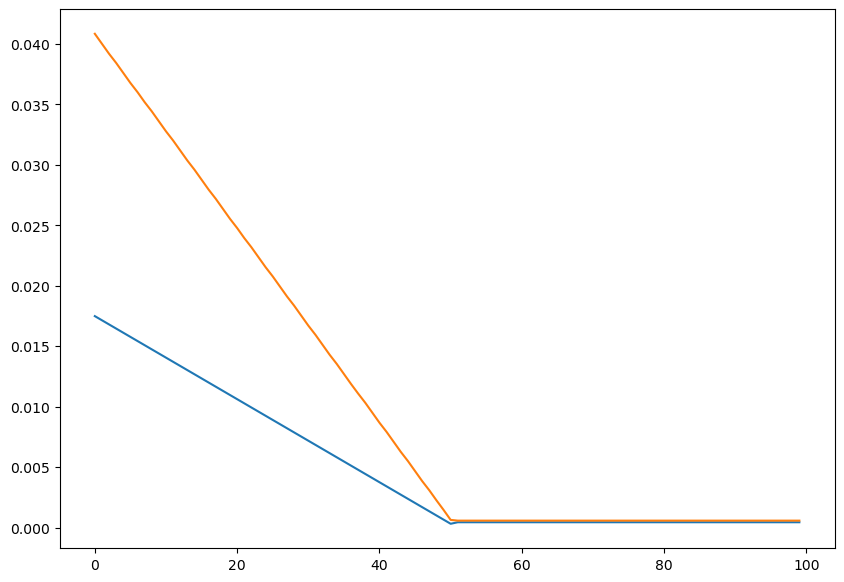

In [530]:
# Plot the loss curves
plt.figure(figsize=(10, 7))
plt.plot(np.array(torch.Tensor(loss_values).cpu().numpy()), label='Training loss')
plt.plot(np.array(torch.Tensor(test_loss_values).cpu().numpy()), label='Test loss')

In [536]:
# Turn model_1 into evaluation mode
model_1.eval()

# Make predictions with model_1 on the test data
with torch.inference_mode():
    y_preds_new = model_1(X_test)

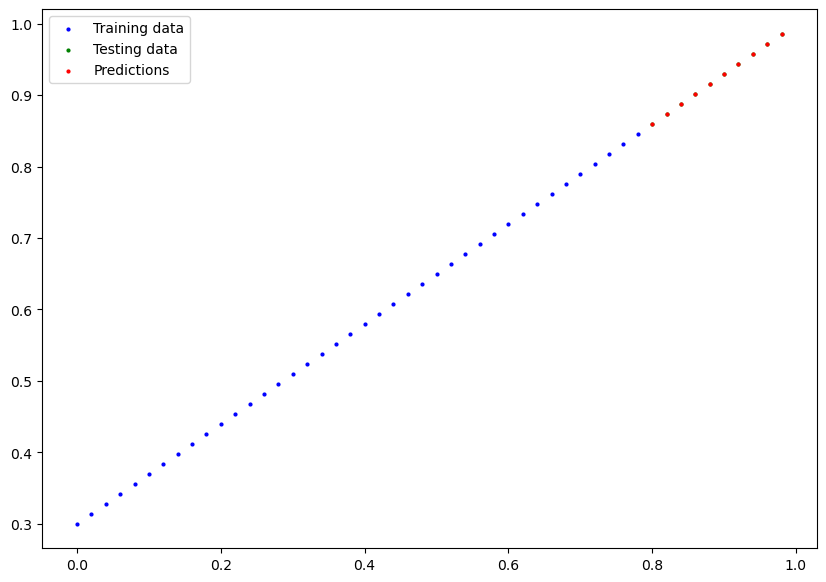

In [539]:
# Plot the predictions
plot_predictions(predictions=y_preds_new.cpu())

In [540]:
# Saving & loading the model_1
# 1. Create a directory
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)

# 2. Create a model save path
MODEL_NAME = "model_1.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

# 3. Save the model's state_dict
print(f"Saving model state dict at: {MODEL_SAVE_PATH}")
torch.save(obj=model_1.state_dict(), f=MODEL_SAVE_PATH)

Saving model state dict at: models/model_1.pth


In [542]:
# Load the model

# Create a new instance
loaded_model_1 = LinearRegressionModelV2()

# Load the saved state dict into the model
loaded_model_1.load_state_dict(torch.load(MODEL_SAVE_PATH))
loaded_model_1.state_dict()

# Put the model on the target device
loaded_model_1.to(device)

# Make predictions with the loaded model
loaded_model_1.eval()
with torch.inference_mode():
    loaded_model_preds = loaded_model_1(X_test)

loaded_model_preds

tensor([[0.8600],
        [0.8739],
        [0.8878],
        [0.9018],
        [0.9157],
        [0.9296],
        [0.9436],
        [0.9575],
        [0.9714],
        [0.9854]], device='mps:0')

In [543]:
# Compare model_1 preds with loaded_model_1 preds
torch.equal(y_preds_new, loaded_model_preds)

True